In [1]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from useful_scit.imps import (np, plt)

from sectional_v2.data_info import get_nice_name_case
from sectional_v2.util.imports import get_averaged_fields
from sectional_v2.util.imports.get_fld_fixed import get_field_fixed
from sectional_v2.util.plot.plot_levlat import  plot_levlat_abs, plot_levlat_diff, get_cbar_eq_kwargs, make_cbar_kwargs, set_vmin_vmax, set_vmin_vmax_abs
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
from sectional_v2.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr


# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV/
/home/ubuntu/mnts/nird/projects/OAS-DEV/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from useful_scit.plot.fig_manip import subp_insert_abc

In [3]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2014-12'
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

## Cases

In [4]:
cases_sec = ['SECTv21_ctrl_koagD']
cases_orig = ['noSECTv21_default_dd', 'noSECTv21_ox_ricc_dd']
# cases_orig =['noSECTv21_ox_ricc']

cases = cases_orig + cases_sec

In [5]:
version = 'v21dd_abs'
plot_path = get_plotpath('levlat')
filen_base = plot_path + '/_%s' % version
# print(plot_path)
make_folders(plot_path)

In [6]:
SO4_NA = 'SO4_NA'
SOA_NA = 'SOA_NA'
def get_frac(case_dic):
    for case in case_dic.keys():
        ds = case_dic[case]
        tot =ds[SO4_NA] + ds[SOA_NA]
        fSOA = ds[SOA_NA]/tot*100
        fSO4 = ds[SO4_NA]/tot*100
        case_dic[case]['fSOA'] =fSOA
        case_dic[case]['fSO4'] =fSO4
        case_dic[case]['fSOA'].attrs['units'] ='%'
        case_dic[case]['fSO4'].attrs['units'] ='%'



In [7]:
def load_and_plot_abss(varl, case_ctrl, start_time, end_time,
                        pressure_coords=True,
                        relative=False,
                        cbar_orient='vertical',
                        asp_ratio=2, subfig_size=3,
                        ncol=None,
                        ylim=None,
                        yscale='log',
                        norm=None,
                       cmap='Reds'
                        ):
    if ylim is None:
        ylim = [1e3, 100]
    cases_dic = get_averaged_fields.get_levlat_cases(cases, varl, start_time, end_time,
                                                      pressure_adjust=pressure_coords)
    _nv = len(varl)
    if ncol is None:
        if _nv > 3:
            ncol = 2
        else:
            ncol = 1
    # noinspection PyUnresolvedReferences
    nrow = int(np.ceil(_nv / ncol))
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
    for ax, var in zip(axs.flat, varl):
        plot_levlat_abs(var, case_ctrl, cases_dic,
                        cbar_orientation=cbar_orient,
                        title=None,
                        ax=ax,
                        ylim=ylim,
                        figsize=None,
                        cmap=cmap,
                        add_colorbar=True,
                        norm=norm,
                        yscale=yscale
                        
                    )

    return axs


def load_and_plot_abs_more_cases(varl, 
                                 cases, 
                                 startyear, endyear,
                                 pressure_adjust=pressure_adjust,
                                 cbar_orientation='vertical',
                                 asp_ratio=2, 
                                 subfig_size=3,
                                 ylim=None,
                                 yscale='log',
                                 cbar_eq=True,
                                 norm=None):
    if ylim is None:
        ylim = [1e3, 100]
    imp_cases = cases#list(set(cases).union({case_oth}))
    print(imp_cases)
    cases_dic = get_averaged_fields.get_levlat_cases(imp_cases, varl, startyear, endyear,
                                                     pressure_adjust=pressure_adjust)
    ncol = len(cases)
    nrow = len(varl)
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
    for j, var in enumerate(varl):
        saxs = axs[j, :]
        levlat_more_cases_var_abs(var, 
                                  cases, 
                                  cases_dic, 
                                  cbar_eq=cbar_eq, 
                                  cbar_orientation=cbar_orientation, 
                                  axs = saxs, 
                                  norm = norm, 
                                  ylim = ylim,
                                  yscale= yscale)
    return axs


def levlat_more_cases_var_abs(var, 
                              cases, 
                              cases_dic, 
                              cbar_eq=True, 
                              cbar_orientation='vertical', 
                              axs=None,
                              norm=None, 
                              ylim=None, 
                              yscale='log'):
    if ylim is None:
        ylim = [1e3, 100]
    if cbar_eq:
        kwargs_plt = dict()
        cba_kwargs = set_vmin_vmax_abs(cases, cbar_eq, None, cases_dic, var)
        #get_cbar_eq_kwargs(cases, case_oth, relative, cases_dic, var)
        if norm is not None:
            del cba_kwargs['vmin']
            del cba_kwargs['vmax']
            del cba_kwargs['robust']

    else:
        cba_kwargs = None
    for i, case_ctrl in enumerate(cases):
        ax = axs[i]
        # if cbar_eq and i<len(cases)-1:
        #    cba_kwargs['add_colorbar']=False
        # else:
        #    cba_kwargs['add_colorbar']=True
        plot_levlat_abs(var, case_ctrl, cases_dic,
                        cbar_orientation=cbar_orientation,
                        #title=case_ctrl,
                        ax=ax,
                        ylim=ylim,
                        figsize=None,
                        add_colorbar=True,
                        norm=norm,
                        yscale=yscale, 
                        **cba_kwargs
                    )



In [8]:
varlist = ['SOA_NA', 'SO4_NA']
cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
# noinspection PyTypeChecker

In [9]:
cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/SO4_NA_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NA_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/SOA_NA_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NA_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NA_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SO4_NA_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/SO4_NA_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SO4_NA_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SO4_NA_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_NA_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/SOA_NA_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_NA_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_NA_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SO4_NA_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/SO4_NA_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SO4_NA_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SO4_NA_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [10]:
get_frac(cases_dic)

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


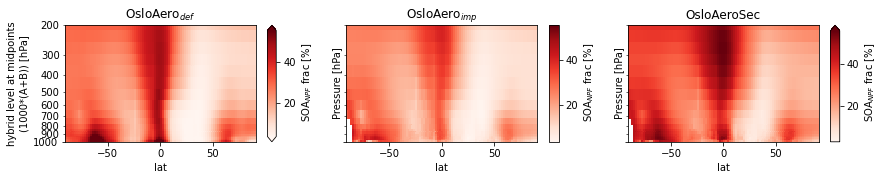

In [11]:
nrow=1
var = 'fSOA'
ncol = len(cases)
nrow = 1#len(varlist)
subfig_size = 2.6
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]

fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
levlat_more_cases_var_abs(var,cases, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=axs,
                          #norm=colors.Lin,
                          ylim=[1e3, 200],
                          yscale='log')
plt.tight_layout()

## Cloud properties

Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/AWNC_incld_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/AREL_incld_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/CLOUD_2008-01-2014-12.nc 
<xarray.DataArray 'time' (time: 84)>
array([ 396.,  425.,  456.,  486.,  517.,  547.,  578.,  609.,  639.,  670.,
        700.,  731.,  762.,  790.,  821.,  851.,  882.,  912.,  943.,  974.,
       1004., 1035., 1065., 1096., 1127., 1155., 1186., 1216., 1247., 1277.,
       1308., 1339., 1369., 1400., 1430., 1461., 1492., 1520., 1551., 1581.,
       1612., 1642., 1673., 1704., 1734., 1765., 1795., 1826., 1857., 1886.,
       1917., 1947., 1978., 2008., 2039., 2070., 2100., 2131., 2161., 2192.,
       2223., 2251., 2282., 2312., 2343., 2

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


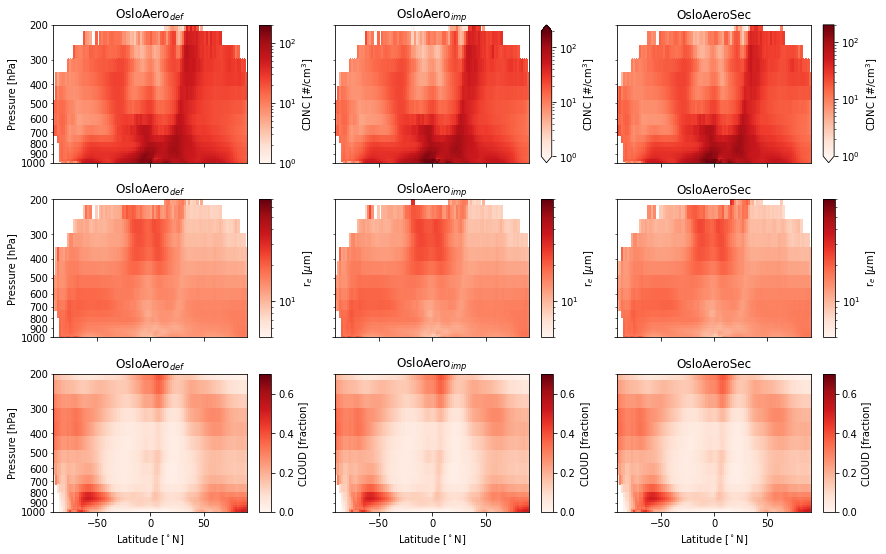

In [12]:
varlist = ['AWNC_incld', 'AREL_incld','CLOUD']
cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
ncol = len(cases)
nrow = len(varlist)
subfig_size = 2.6
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
# noinspection PyTypeChecker
fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
CLOUD = 'CLOUD'
norm_dic = dict(
    NCONC01=colors.LogNorm(vmin=10, vmax=1e4),# base=10),
    NMR01=colors.LogNorm(vmin=10, vmax=100),# base=10),
    AWNC_incld=colors.LogNorm(vmin=1, vmax=200),# base=10),
    AREL_incld=colors.LogNorm(vmin=5, vmax=70),#, base=10)
    CLOUD=colors.Normalize(vmin=0, vmax=.7)
)
cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)

for j, var in enumerate(varlist):
    saxs = axs[j, :]
    levlat_more_cases_var_abs(var, cases, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=saxs,
                          norm=norm_dic[var],
                          ylim=[1e3, 200],
                          yscale='log')
for ax in axs.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
for ax in axs[:, 0]:
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[-1, :]:
    ax.set_xlabel('Latitude [$^\circ$N]')
fig.tight_layout()
fn = filen_base + f'N_clouds_{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'
plt.savefig(fn + '.pdf')
#plt.savefig(fn + '.png')
plt.show()

## Gases:

In [ ]:
varlist = ['H2SO4', 'SOA_LV', 'SOA_SV']# 'SOA_NA','SO4_NA']
cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
ncol = len(cases)
nrow = len(varlist)
subfig_size = 2.6
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
# noinspection PyTypeChecker
fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)

h2so4 = 'H2SO4'
soalv = 'SOA_LV'
soasv = 'SOA_SV'
soana='SOA_NA'
so4na = 'SO4_NA'

norm_dic = {
    h2so4 : colors.LogNorm(vmin=1e-2, vmax=1),# base=10),
    soalv : colors.LogNorm(vmin=1e-3, vmax=1),# base=10),
    soasv : colors.LogNorm(vmin=1e-2, vmax=10),# base=10),
    so4na : colors.LogNorm(vmin=1e-12, vmax=1e-10),#, base=10)
    soana : colors.LogNorm(vmin=1e-12, vmax=1e-10)
}
cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)
if h2so4 in varlist or soalv in varlist:
    for case in cases:
        ds = cases_dic[case]
        for var in [h2so4, soalv, soasv]:
            if var in ds.data_vars:
                if ds[var].attrs['units'] == 'mol/mol':
                    ds[var] = ds[var]*1e12
                    ds[var].attrs['units']='ppt'

for j, var in enumerate(varlist):
    saxs = axs[j, :]
    levlat_more_cases_var_abs(var, cases, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=saxs,
                          norm=norm_dic[var],
                          ylim=[1e3, 200],
                          yscale='log')
for ax in axs.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
for ax in axs[:, 0]:
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[-1, :]:
    ax.set_xlabel('Latitude [$^\circ$N]')
fig.tight_layout()
fn = filen_base + f'N_clouds_{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'
#plt.savefig(fn + '.pdf')
#plt.savefig(fn + '.png')
fn = filen_base + f'abs_latlev_gases_{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)

plt.show()

Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/H2SO4_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/H2SO4_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/H2SO4_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/H2SO4_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_LV_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/SOA_LV_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_LV_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_LV_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_SV_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_default_dd/SOA_SV_NorESM_noSECTv21_default_dd_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_SV_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_SV_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/H2SO4_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/H2SO4_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/H2SO4_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/H2SO4_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_LV_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/SOA_LV_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_LV_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_LV_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_SV_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/noSECTv21_ox_ricc_dd/SOA_SV_NorESM_noSECTv21_ox_ricc_dd_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_SV_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_SV_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/H2SO4_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/H2SO4_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/H2SO4_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/H2SO4_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_LV_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/SOA_LV_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_LV_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_LV_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_SV_2008-01-2014-12.nc 
Loading file: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//Fields_pressure_coordinates/NorESM/SECTv21_ctrl_koagD/SOA_SV_NorESM_SECTv21_ctrl_koagD_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_SV_2008-01-2014-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl_koagD/SOA_SV_2008-01-2014-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


## Aerosol properties:

In [ ]:
varlist = ['SOA_NA','SO4_NA', 'N_AER','NCONC01','NMR01']
cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
ncol = len(cases)
nrow = len(varlist)
subfig_size = 2.6
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
# noinspection PyTypeChecker
fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)

h2so4 = 'H2SO4'
soalv = 'SOA_LV'
soasv = 'SOA_SV'
soana='SOA_NA'
so4na = 'SO4_NA'
naer = 'N_AER'
NMR01 = 'NMR01'
NCONC01 = 'NCONC01'
norm_dic = {
    h2so4 : colors.LogNorm(vmin=1e-2, vmax=1),# base=10),
    soalv : colors.LogNorm(vmin=1e-3, vmax=1),# base=10),
    soasv : colors.LogNorm(vmin=1e-2, vmax=10),# base=10),
    so4na : colors.LogNorm(vmin=1e-12, vmax=1e-10),#, base=10)
    soana : colors.LogNorm(vmin=1e-12, vmax=5e-11),
    naer :colors.LogNorm(vmin=10, vmax=1e4),
    NCONC01:colors.LogNorm(vmin=10, vmax=1e4),# base=10),
    NMR01: colors.LogNorm(vmin=10, vmax=100),# base=10),

}
cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)
if h2so4 in varlist or soalv in varlist:
    for case in cases:
        ds = cases_dic[case]
        for var in [h2so4, soalv, soasv]:
            if var in ds.data_vars:
                if ds[var].attrs['units'] == 'mol/mol':
                    ds[var] = ds[var]*1e12
                    ds[var].attrs['units']='ppt'

for j, var in enumerate(varlist):
    saxs = axs[j, :]
    levlat_more_cases_var_abs(var, cases, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=saxs,
                          norm=norm_dic[var],
                          ylim=[1e3, 200],
                          yscale='log')
for ax in axs.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
for ax in axs[:, 0]:
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[-1, :]:
    ax.set_xlabel('Latitude [$^\circ$N]')
fig.tight_layout()

#plt.savefig(fn + '.png')
plt.show()